# Лабораторная работа 4 В-11

In [67]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import stats, linalg

In [68]:
df = pd.read_excel("LAB_4_DATA_2024.xlsx")
df

,СТАЖ РАБОТЫ (лет),"ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","ПОЛ (1-жен, 0- муж)",Зарплата (долл. в час)
0,22.384615,12,0,53.410000
1,8.903846,12,0,8.000000
2,13.250000,15,0,24.000000
3,18.250000,13,0,29.500000
4,13.769231,18,0,32.049999
...,...,...,...,...
535,7.307693,12,1,9.500000
536,19.288462,14,1,17.299999
537,21.230770,12,1,27.520000
538,18.076923,13,1,3.880000


In [69]:
shuffled_df = df.sample(frac=1, random_state=42)
shuffled_df

,СТАЖ РАБОТЫ (лет),"ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","ПОЛ (1-жен, 0- муж)",Зарплата (долл. в час)
229,20.173077,12,0,15.000000
73,17.961538,19,0,47.000000
521,12.269231,16,1,15.000000
86,20.038462,12,0,20.000000
469,20.538462,12,1,24.389999
...,...,...,...,...
71,18.846153,12,0,8.770000
106,21.423077,9,0,6.480000
270,13.557693,16,1,17.620001
435,18.403847,13,1,13.790000


In [70]:
z = shuffled_df.iloc[:, 0].values[:460].reshape(-1, 1)
y = shuffled_df.iloc[:, 3].values[:460]
print(z)
print(y)

[[20.17307663]
 [17.96153831]
 [12.26923084]
 [20.03846169]
 [20.53846169]
 [14.19230747]
 [19.42307663]
 [18.55769157]
 [ 5.17307711]
 [16.34615326]
 [19.48077011]
 [21.15384674]
 [16.09615326]
 [22.73077011]
 [22.88461494]
 [19.92307663]
 [15.98076916]
 [23.25      ]
 [13.82692337]
 [ 9.51923084]
 [15.38461494]
 [20.86538506]
 [21.36538506]
 [15.36538506]
 [18.03846169]
 [13.25      ]
 [11.86538506]
 [ 6.11538458]
 [16.38461494]
 [16.65384674]
 [13.        ]
 [20.19230843]
 [15.32692337]
 [15.80769253]
 [ 9.88461494]
 [15.42307663]
 [13.61538506]
 [17.88461494]
 [15.01923084]
 [12.57692337]
 [ 9.92307663]
 [18.98077011]
 [16.44230843]
 [19.19230843]
 [19.21153831]
 [22.76922989]
 [17.90384674]
 [20.36538506]
 [21.88461494]
 [13.23076916]
 [13.98076916]
 [14.92307663]
 [19.51922989]
 [22.03846169]
 [ 4.44230747]
 [14.98076916]
 [21.07692337]
 [15.71153831]
 [18.21153831]
 [12.96153831]
 [13.32692337]
 [ 4.26923084]
 [15.46153831]
 [ 7.30769253]
 [22.67307663]
 [17.26922989]
 [15.75   

### 1.1 Найдите оценки параметров линейной модели зависимости ЗАРПЛАТЫ от стажа

In [71]:
model = LinearRegression()
model.fit(z, y)

LinearRegression()

In [72]:
b_0_hat=model.intercept_
print('intercept:', b_0_hat) 
b_1_hat=model.coef_
print('slope:', b_1_hat) 
print('coefficient of determination:', model.score(z, y))

intercept: 16.073607347255425
slope: [0.19473189]
coefficient of determination: 0.004029521891497523


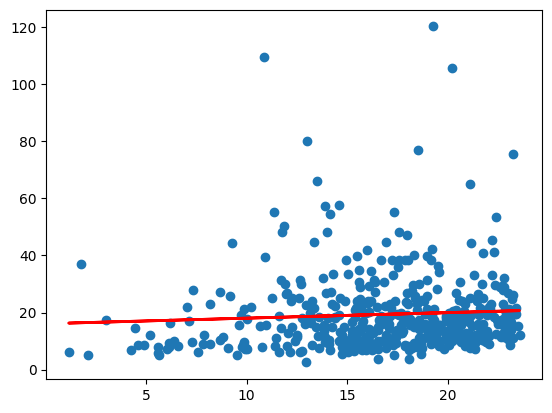

In [73]:
plt.scatter(z,y)
plt.plot(z, model.predict(z), color='red', linewidth=2)

In [74]:
n = len(y)
p = z.shape[1]  

y_pred = model.predict(z)
y_mean = np.mean(y)

ESS = np.sum((y - y_pred)**2)   
TSS = np.sum((y - y_mean)**2)   

RSS = TSS - ESS
print(f'RSS: {RSS}')
print(f'ESS: {ESS}')
print(f'TSS: {TSS}')

R_2 = 1 - ESS/TSS
print(f"R^2: {R_2}")

RSS: 353.03743435870274
ESS: 87259.69773991243
TSS: 87612.73517427113
R^2: 0.004029521891497523


### 1.2 Проверьте на уровне значимости a, обладает ли построенная модель высокой объясняющей способностью, или же модель низкого качества. 

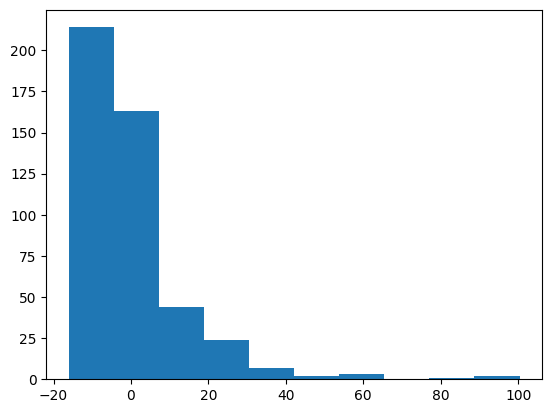

ShapiroResult(statistic=0.7290079598973405, pvalue=1.1153834486357859e-26)

In [75]:
errors = y - y_pred
plt.hist(errors)
plt.show()
sp.stats.shapiro(errors)

In [76]:
from scipy.stats import f
n = 460 
alpha = 0.065
m = 1
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_cr = f.ppf(1-alpha, m, n-m-1)
print(f"F_cr - критическое значение: {F_cr}")
print("H0: R^2 - незначим \nH1: R^2 - значим")
if F > F_cr:
    print(f"Отвергаем H0. Коээфициент R2 значим на уровне alpha = {alpha}")
else:
    print(f"Принимаем H0. Коээфициент R2 не значим на уровне alpha = {alpha}")


F - наблюдаемое значение: 1.852987680730054
F_cr - критическое значение: 3.4214106995945373
H0: R^2 - незначим 
H1: R^2 - значим
Принимаем H0. Коээфициент R2 не значим на уровне alpha = 0.065


In [77]:
import statsmodels.api as sm
X_new = sm.add_constant(z)
model_1 = sm.OLS(y, X_new).fit()
print(model_1.summary(alpha = 0.065))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.853
Date:                Wed, 25 Dec 2024   Prob (F-statistic):              0.174
Time:                        16:05:40   Log-Likelihood:                -1859.2
No. Observations:                 460   AIC:                             3722.
Df Residuals:                     458   BIC:                             3731.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     [0.0325     0.9675]
------------------------------------------------------------------------------
const         16.0736      2.499      6.432      0.0

### 1.3 Найдите оценки параметров линейной модели   зависимости ЗАРПЛАТЫ от СТАЖА РАБОТЫ и ВРЕМЕНИ, ЗАТРАЧЕННОГО НА ОБРАЗОВАНИЕ. 

In [78]:
z_expirience = shuffled_df.iloc[:, 0].values[:520]
z_education = shuffled_df.iloc[:, 1].values[:520]
y = shuffled_df.iloc[:, 3].values[:520]
X = np.column_stack((z_expirience, z_education))
print(X.shape)
print(y.shape)

(520, 2)
(520,)


In [79]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [80]:
b_0_hat=model.intercept_
print('intercept:', b_0_hat) 
b_1_hat=model.coef_
print(f'b_1 (Опыт работы):', b_1_hat[0]) 
print(f'b_2 (Время потраченное на образование):', b_1_hat[1]) 
print('coefficient of determination:', model.score(X, y))

intercept: -25.42326709815232
b_1 (Опыт работы): 0.555079676952301
b_2 (Время потраченное на образование): 2.6171090317704695
coefficient of determination: 0.19236968936827958


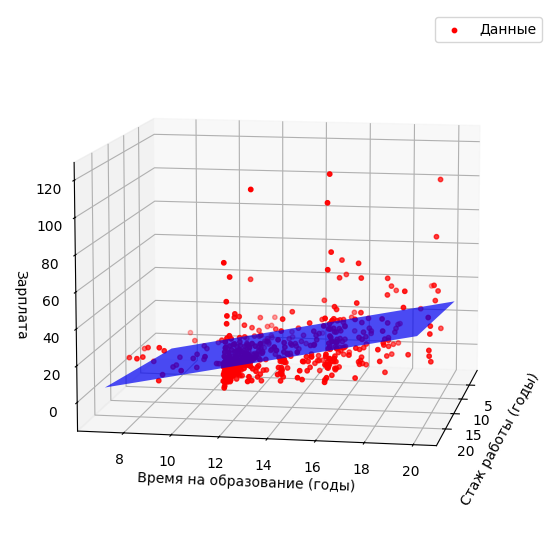

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


x1_range = np.linspace(min(z_expirience), max(z_expirience), 100)
x2_range = np.linspace(min(z_education), max(z_education), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)  


X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))


y_grid = model.predict(X_grid)

y_grid = y_grid.reshape(x1_grid.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(z_expirience, z_education, y, color='r', label='Данные', s=10)

ax.plot_surface(x1_grid, x2_grid, y_grid, color='b', alpha=0.7, rstride=100, cstride=100)


ax.set_xlabel('Стаж работы (годы)')
ax.set_ylabel('Время на образование (годы)')
ax.set_zlabel('Зарплата')

ax.legend()

ax.view_init(elev=10, azim=10)  
plt.show()


### 1.4-1.5 На сколько в среднем изменится ЗАРПЛАТА, если СТАЖ РАБОТЫ увеличить на 1 год, а ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ, останется неизменным? Какую в среднем прибавку к ЗАРПЛАТЕ  дает дополнительный год обучения? 

In [82]:
b_1_hat=model.coef_
print('Увеличение зарплаты если стаж увеличить на год:', b_1_hat[0]) 
print('Увеличение зарплаты если время обучения увеличить на год:', b_1_hat[1]) 

Увеличение зарплаты если стаж увеличить на год: 0.555079676952301
Увеличение зарплаты если время обучения увеличить на год: 2.6171090317704695


### 1.6 Проверьте на уровне значимости a, обладает ли построенная двухфакторная модель высокой объясняющей способностью, или же модель низкого качества. 

In [83]:
n = len(y)
p = z.shape[1]  

y_pred = model.predict(X)
y_mean = np.mean(y)

ESS = np.sum((y - y_pred)**2)   
TSS = np.sum((y - y_mean)**2)   

RSS = TSS - ESS
print(f"RSS: {RSS}")
print(f"ESS: {ESS}")
print(f"TSS: {TSS}")

R_2 = 1 - ESS/TSS
print(f"R2: {R_2}")

RSS: 20833.78239980289
ESS: 87466.97157146303
TSS: 108300.75397126592
R2: 0.19236968936827958


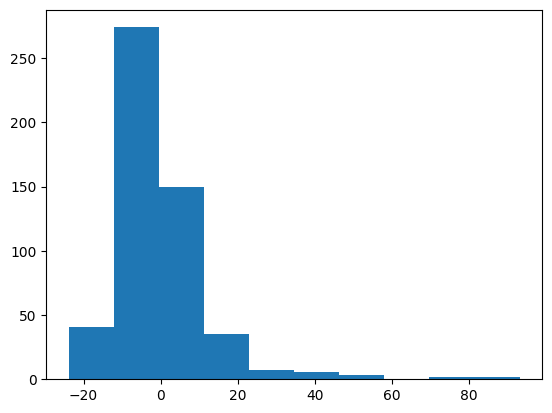

ShapiroResult(statistic=0.7603759746488803, pvalue=8.207962480157801e-27)

In [84]:
errors = y - y_pred
plt.hist(errors)
plt.show()
sp.stats.shapiro(errors)

In [85]:
from scipy.stats import f
n = 460 
alpha = 0.065
m = 2
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_cr = f.ppf(1-alpha, m, n-m-1)
print(f"F_cr - критическое значение: {F_cr}")
print("H0: R^2 - незначим \nH1: R^2 - значим")
if F > F_cr:
    print(f"Отвергаем H0. Коээфициент R2 значим на уровне alpha = {alpha}")
else:
    print(f"Принимаем H0. Коээфициент R2 не значим на уровне alpha = {alpha}")

F - наблюдаемое значение: 54.42647885053936
F_cr - критическое значение: 2.7497819721080243
H0: R^2 - незначим 
H1: R^2 - значим
Отвергаем H0. Коээфициент R2 значим на уровне alpha = 0.065


In [86]:
X_new = sm.add_constant(X)
model_2 = sm.OLS(y, X_new).fit()
print(model_2.summary(alpha = 0.065))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     61.57
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           1.03e-24
Time:                        16:05:40   Log-Likelihood:                -2070.4
No. Observations:                 520   AIC:                             4147.
Df Residuals:                     517   BIC:                             4160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     [0.0325     0.9675]
------------------------------------------------------------------------------
const        -25.4233      4.375     -5.811      0.0

### 1.7 С надежностью y постройте доверительные интервалы для теоретических коэффициентов регрессии модели

In [87]:
errors = y - y_pred
n = len(y) 
Se2 = np.sum(errors**2)/(n-2-1)
Se = np.sqrt(Se2)
print(Se)

13.006989013385043


In [88]:
n = len(y)
X_matr = np.column_stack((np.ones((n, 1)), z_expirience, z_education))
X_matr

array([[ 1.        , 20.17307663, 12.        ],
       [ 1.        , 17.96153831, 19.        ],
       [ 1.        , 12.26923084, 16.        ],
       ...,
       [ 1.        ,  9.25      , 18.        ],
       [ 1.        , 21.40384674, 12.        ],
       [ 1.        , 19.73077011, 16.        ]])

In [89]:
X_matr_T=X_matr.transpose()
Z=X_matr_T.dot(X_matr)
Z_inv =linalg.inv(Z)

In [90]:
se_b_0_hat=Se*math.sqrt(Z_inv[0][0])
print(f"Стандартная ошибка коэффициента b_0_hat: {se_b_0_hat}")   
se_b_1_hat=Se*math.sqrt(Z_inv[1][1])
print(f"Стандартная ошибка коэффициента b_1_hat: {se_b_1_hat}")   
se_b_2_hat=Se*math.sqrt(Z_inv[2][2])
print(f"Стандартная ошибка коэффициента b_2_hat: {se_b_2_hat}")    

Стандартная ошибка коэффициента b_0_hat: 4.3753618323786805
Стандартная ошибка коэффициента b_1_hat: 0.13118085729568726
Стандартная ошибка коэффициента b_2_hat: 0.2392672264766887


In [91]:
gamma = 0.935
n = len(y)
m = 2
b_0_hat=model.intercept_
b_1_hat=model.coef_[0]
b_2_hat=model.coef_[1]

t_cr = stats.t.ppf((1+gamma)/2, n-m-1)
print(f"Доверительный интервал для b_0_hat на уровне надежности: {gamma}: {b_0_hat - (t_cr*se_b_0_hat), b_0_hat + (t_cr*se_b_0_hat)}")
print(f"Доверительный интервал для b_1_hat на уровне надежности: {gamma}: {b_1_hat - (t_cr*se_b_1_hat), b_1_hat + (t_cr*se_b_1_hat)}")
print(f"Доверительный интервал для b_2_hat на уровне надежности: {gamma}: {b_2_hat - (t_cr*se_b_2_hat), b_2_hat + (t_cr*se_b_2_hat)}")

Доверительный интервал для b_0_hat на уровне надежности: 0.935: (-33.514172874594976, -17.332361321709662)
Доверительный интервал для b_1_hat на уровне надежности: 0.935: (0.31250043511726455, 0.7976589187873374)
Доверительный интервал для b_2_hat на уровне надежности: 0.935: (2.1746568051939987, 3.0595612583469403)


In [92]:
b_1_hat=model.coef_[0]
b_2_hat=model.coef_[1]

alpha = 0.065
n = len(y)
m = 2

t_1 = b_1_hat/ se_b_1_hat
print(f'СВ t_1:  {t_1}')
t_2 = b_2_hat/ se_b_2_hat
print(f'СВ t_2:  {t_2}')

t_cr = stats.t.ppf(1-alpha/2, n - m - 1)
print(t_cr)

if -t_cr < t_1 < t_cr:
    print(f"Коэффициент b1_hat не значим на уровне значимости alpha: {alpha}")
else:
    print(f"Коэффициент b1_hat значим на уровне значимости alpha: {alpha}")

if -t_cr < t_2 < t_cr:
    print(f"Коэффициент b2_hat не значим на уровне значимости alpha: {alpha}")
else:
    print(f"Коэффициент b2_hat значим на уровне значимости alpha: {alpha}")

СВ t_1:  4.231407603177403
СВ t_2:  10.93801717146351
1.8491969547679692
Коэффициент b1_hat значим на уровне значимости alpha: 0.065
Коэффициент b2_hat значим на уровне значимости alpha: 0.065
